In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [95]:
#Importer la BDD
pd.set_option('display.max_columns',40)   #afficher tous les colmns
data = pd.read_csv("D:/ETUDES/Etude Machine Learning Marouan/school_help_dashboard/school_help_dashboard/data/exercice_data.csv",encoding='latin1')  # Adapter le chemin de la BDD avec votre chemin
data.head()

,StudentID,FirstName,FamilyName,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,Rafael,Morais,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,1,Lara,Braga,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,2,Gonçalo,Azevedo,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,3,Lara,Perna,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,4,João,Pires,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10


In [96]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudentID   357 non-null    int64 
 1   FirstName   357 non-null    object
 2   FamilyName  357 non-null    object
 3   sex         357 non-null    object
 4   age         357 non-null    int64 
 5   address     357 non-null    object
 6   famsize     357 non-null    object
 7   Pstatus     357 non-null    object
 8   Medu        357 non-null    int64 
 9   Fedu        357 non-null    int64 
 10  Mjob        357 non-null    object
 11  Fjob        357 non-null    object
 12  reason      357 non-null    object
 13  guardian    357 non-null    object
 14  traveltime  357 non-null    int64 
 15  studytime   357 non-null    int64 
 16  failures    357 non-null    int64 
 17  schoolsup   357 non-null    object
 18  famsup      357 non-null    object
 19  paid        357 non-null    object
 20  activities

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,193.176471,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,115.771252,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,89.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,196.000000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,292.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [97]:
data.isna().sum()

StudentID     0
FirstName     0
FamilyName    0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
FinalGrade    0
dtype: int64

In [98]:
data.duplicated().sum()

0

In [99]:
from sklearn.preprocessing import LabelEncoder

# Identifier les colonnes catégorials pour le label encoding
cat_col = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
data_label_encoded = data.copy()

for col in cat_col:
    data_label_encoded[col] = label_encoder.fit_transform(data[col].astype(str))

In [100]:
data_label_encoded.head()

,StudentID,FirstName,FamilyName,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,33,227,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6
1,1,20,37,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,6
2,2,14,23,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,10
3,3,20,270,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15
4,4,19,282,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10


Pour la selection des variable qui seront inclus dans le calcul de la compléxité, nous allons utilisé trois méthode, d'abord une correlation, puis une méthode de selection de variable par Random forest at arbre de decision, et nous allons choisir ceux en commun

<Axes: >

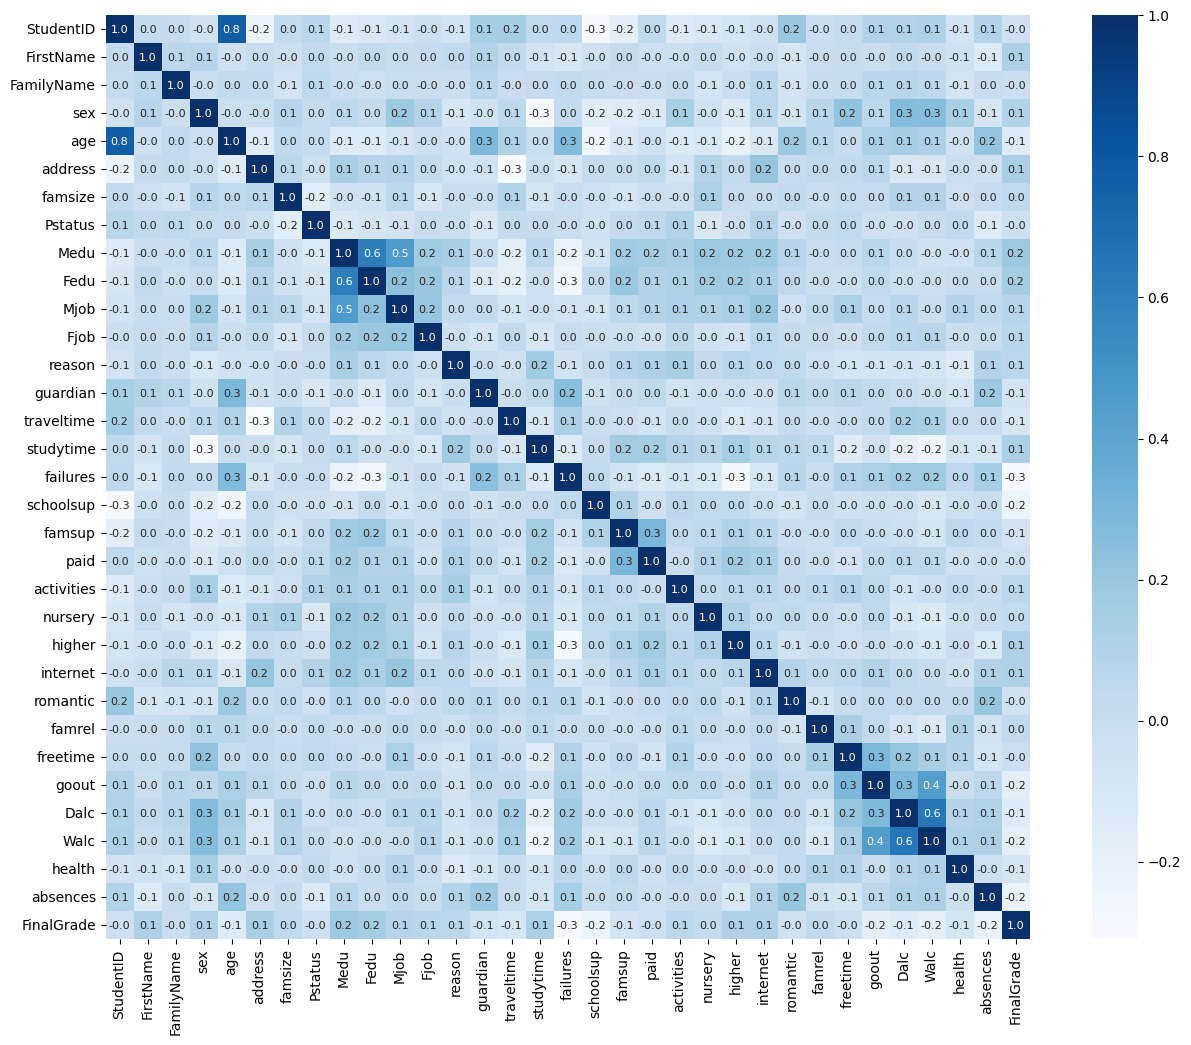

In [101]:
plt.figure(figsize=(16,12))
sns.heatmap(data_label_encoded.corr(),cmap='Blues',cbar='True',square=True,fmt='0.1f',annot=True,annot_kws={'size':8})

In [102]:
corr_matrix = data_label_encoded.corr()

# Sélectionner uniquement les corrélations avec 'FinalGrade'
final_grade_corr = corr_matrix['FinalGrade'].abs().sort_values(ascending=False)

# Filtrer les 10 corrélations les plus importantes (sans inclure 'FinalGrade' lui-même)
top_10_corr_final_grade = final_grade_corr[1:20]  
top_10_corr_final_grade.head(10)

failures     0.293831
schoolsup    0.238365
absences     0.213129
Medu         0.190308
Walc         0.190054
goout        0.177383
Fedu         0.158811
Dalc         0.140690
age          0.140372
address      0.130090
Name: FinalGrade, dtype: float64

In [103]:
# Utilisant mantenant le random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [104]:
data_label_encoded['FinalGrade'] = pd.to_numeric(data_label_encoded['FinalGrade'], errors='coerce')

In [105]:
# Définir les caractéristiques (X) et la cible (y)
X = data_label_encoded.drop(columns=['FinalGrade', 'StudentID', 'FirstName', 'FamilyName'])  # Retirer les colonnes non pertinentes
y = data_label_encoded['FinalGrade']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

# Importance des caractéristiques
feature_importances = forest_model.feature_importances_
important_features_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques importantes
important_rand = important_features_rf.sort_values(by='Importance',ascending=False)

In [107]:
# je vais me concentrer sur le 1/3 de la BDD
important_rand.head(10)

,Feature,Importance
28,absences,0.116487
27,health,0.072648
13,failures,0.069892
12,studytime,0.059394
7,Mjob,0.053636
1,age,0.051970
23,freetime,0.047737
8,Fjob,0.047656
14,schoolsup,0.043593
5,Medu,0.042246


In [108]:
#Nous allons appliquer maintenant le modèle de l'arbre de decision
from sklearn.tree import DecisionTreeRegressor

In [109]:
# Initialiser et entraîner un modèle d'arbre de décision
Tree_model = DecisionTreeRegressor(random_state=42)
Tree_model.fit(X_train, y_train)

# Analyse de l'importance des caractéristiques
feature_importances = Tree_model.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Afficher les caractéristiques importantes
Tree_important = important_features.sort_values(by='Importance',ascending=False)



Tree_important.head(10)

,Feature,Importance
28,absences,0.125277
27,health,0.084220
13,failures,0.078152
8,Fjob,0.059322
14,schoolsup,0.056715
22,famrel,0.055048
11,traveltime,0.053272
12,studytime,0.052311
7,Mjob,0.050825
1,age,0.045631


# Correlation

failures     0.293831
schoolsup    0.238365
absences     0.213129
Medu         0.190308
Walc         0.190054
goout        0.177383
Fedu         0.158811
Dalc         0.140690
age          0.140372
address      0.130090

# Random forest

absences	0.116487
health	0.072648
failures	0.069892
studytime	0.059394
Mjob	0.053636
age	0.051970
freetime	0.047737
Fjob	0.047656
schoolsup	0.043593
Medu	0.042246

# Decision tree

absences	0.125277
health	0.084220
failures	0.078152
Fjob	0.059322
schoolsup	0.056715
famrel	0.055048
traveltime	0.053272
studytime	0.052311
Mjob	0.050825
age	0.045631




Nous allons faire un visualisation de different variables en fonction de la note final

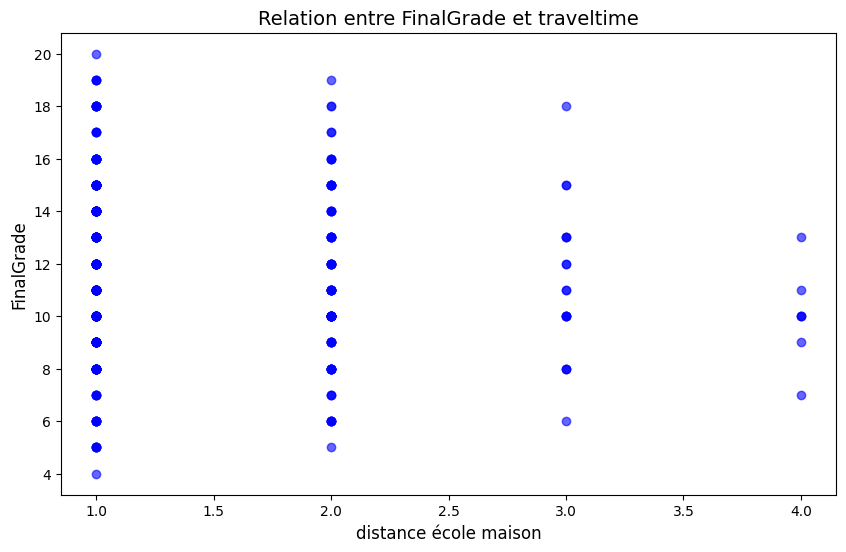

In [110]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction traveltime
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['traveltime'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et traveltime', fontsize=14)
plt.xlabel('distance école maison', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Le graphique suggère qu'il y a une relation négative entre le temps de trajet et la note final. Les étudiants qui vivent plus près de leur école et ont un temps de trajet plus court tendent à obtenir de meilleures notes, a l'inverse, ceux qui passent plus de temps pour accéder à l'école obtiennent généralement des résultats inférieurs, probablement parce qu'un temps de trajet plus long peut réduire le temps et l'énergie disponibles pour étudier.



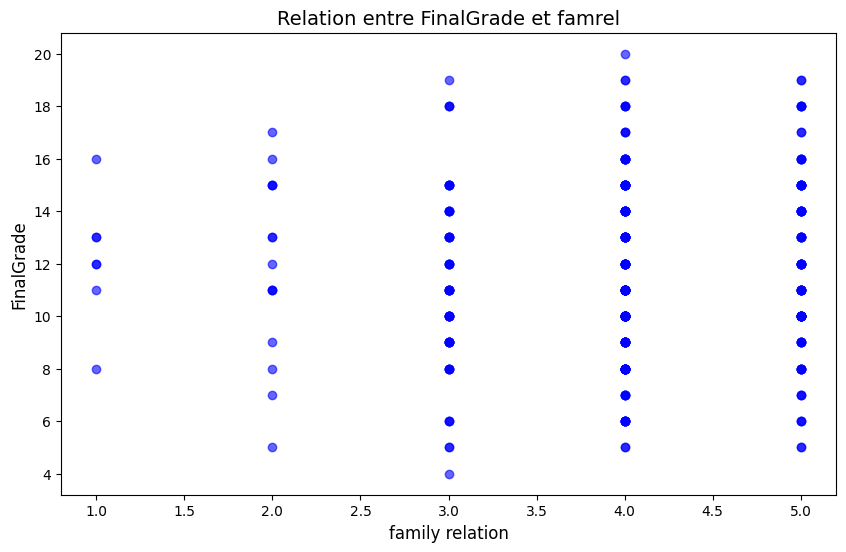

In [111]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction famrel
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['famrel'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et famrel', fontsize=14)
plt.xlabel('family relation', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Il semble y avoir une corrélation positive modérée entre la qualité des relations familiales et la note final. Les étudiants ayant de meilleures relations avec leur famille (famrel = 4 ou 5) tendent à obtenir de meilleures notes. En inverse, les étudiants avec des relations familiales plus faibles (famrel = 1 ou 2) ont tendance à obtenir des notes plus basses. Cela suggère que le soutien et l'environnement familial peuvent jouer un rôle important dans la réussite dans la note final.

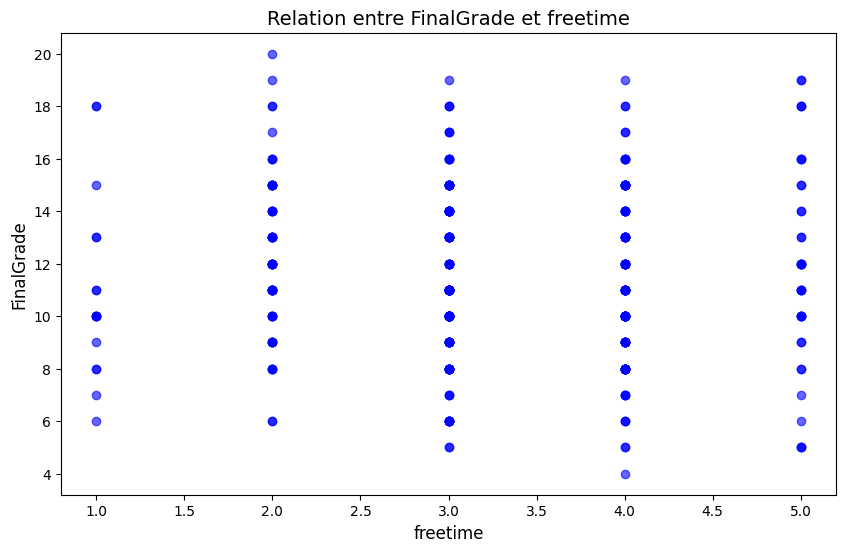

In [112]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction freetime
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['freetime'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et freetime', fontsize=14)
plt.xlabel('freetime', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Le graphique suggère qu'il existe une relation inverse légère entre la quantité de temps libre et les performances académiques. Les étudiants ayant peu de temps libre semblent obtenir de meilleures notes en général, probablement parce qu'ils consacrent une plus grande partie de leur temps à leurs études, mais cette hypothèse est difficle de l'approver . À l'inverse, ceux qui ont plus de temps libre (et qui pourraient potentiellement passer moins de temps à étudier) obtiennent des résultats plus faibles. Cette variable n'est pas significative.

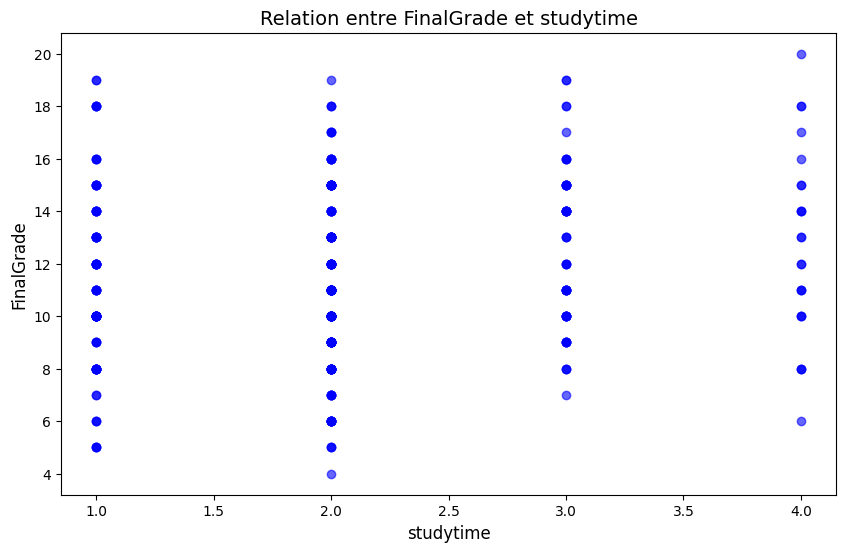

In [113]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction studytime
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['studytime'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et studytime', fontsize=14)
plt.xlabel('studytime', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Le graphique suggère qu'il existe une corrélation positive entre le temps d'étude et l note final. Les étudiants qui passent plus de temps à étudier obtiennent généralement de meilleures notes, tandis que ceux qui étudient moins ont des résultats plus variés, avec une plus grande proportion de notes faibles.

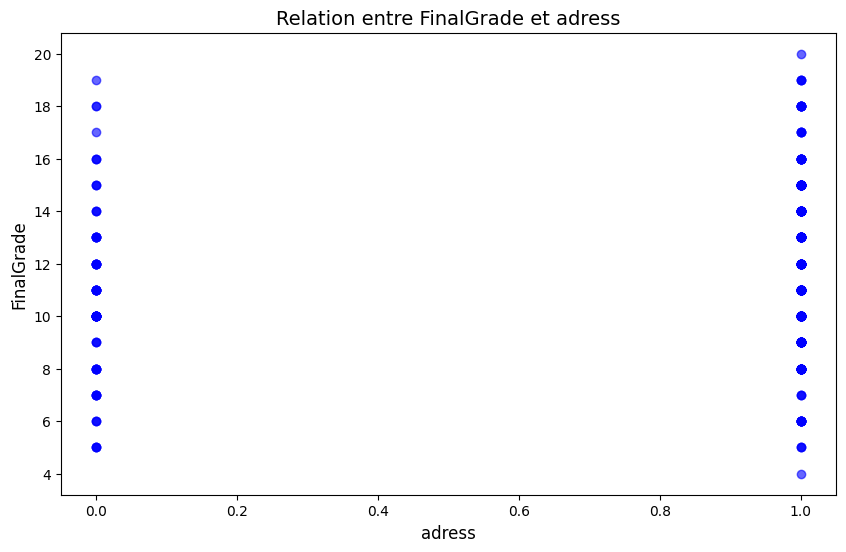

In [114]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction address
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['address'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et adress', fontsize=14)
plt.xlabel('adress', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Le graphique ne montre pas de différence significative dans les performances académiques des étudiants selon qu'ils vivent en milieu urbain ou rural. Les deux groupes ont une répartition assez similaire de leurs notes finales, ce qui suggère que le lieu de résidence n'a pas un impact direct et important sur les résultats final des étudiants dans cet échantillon.

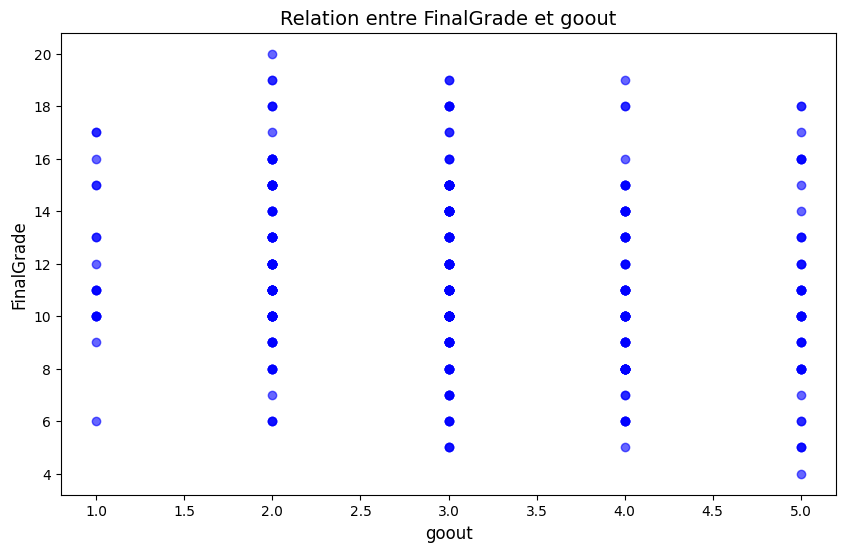

In [115]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction goout
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['goout'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et goout', fontsize=14)
plt.xlabel('goout', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Le graphique semble indiquer une relation inverse modérée entre la fréquence des sorties et FinalGrade. Les étudiants qui sortent moins fréquemment ont tendance à obtenir de meilleures notes, tandis que ceux qui sortent très souvent voient une concentration de leurs résultats autour de la moyenne ou en dessous. Sortir régulièrement avec des amis peut donc avoir un effet légèrement négatif sur les résultats scolaires, probablement parce que cela peut empiéter sur le temps de révision et de concentration sur les études.

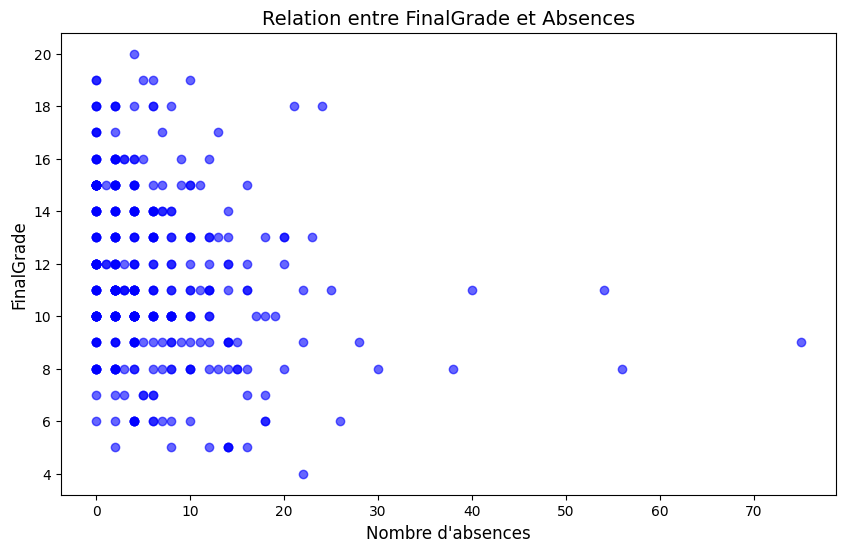

In [116]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction des absences
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['absences'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et Absences', fontsize=14)
plt.xlabel('Nombre d\'absences', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()


La majorité des étudiants ayant des notes élevées entre 15 et 20 ont moins de 10 absences. Cela suggère que la présence régulière en classe est corrélée avec de meilleures performances à l'école. Les notes plus faibles (autour de 6 à 12) sont réparties sur une plus large plage d'absences. On observe que certains étudiants avec un nombre élevé d'absences (plus de 20) obtiennent des notes faibles.
il y a aussi des étudiants avec un faible nombre d'absences qui obtiennent des notes faibles, ce qui suggère que les absences ne sont pas le seul facteur influençant la performance académique.

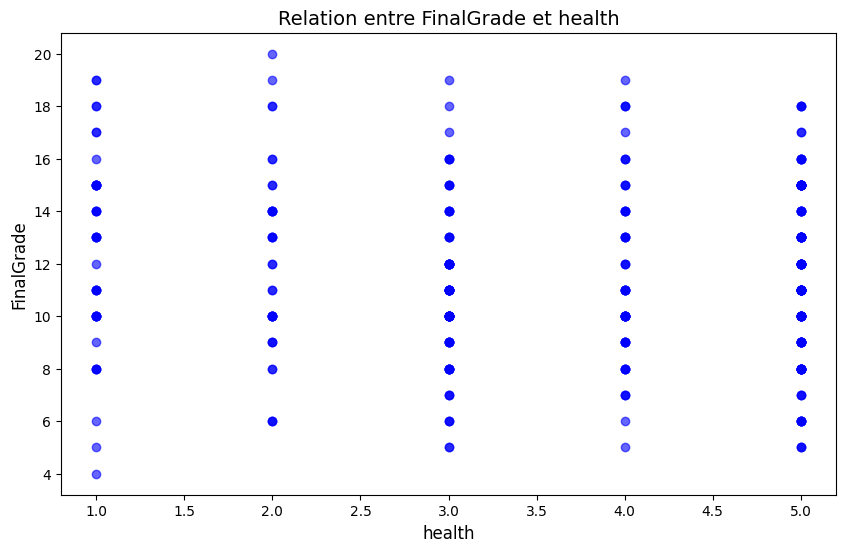

In [117]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction des health
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['health'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et health', fontsize=14)
plt.xlabel('health', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Il n'y a pas de tendance claire montrant que l'état de santé perçu (de 1 à 5) influence directement les résultats académiques. Les notes semblent relativement bien réparties pour chaque valeur de santé, suggérant que la santé perçue n'a pas un impact évident sur la performance académique

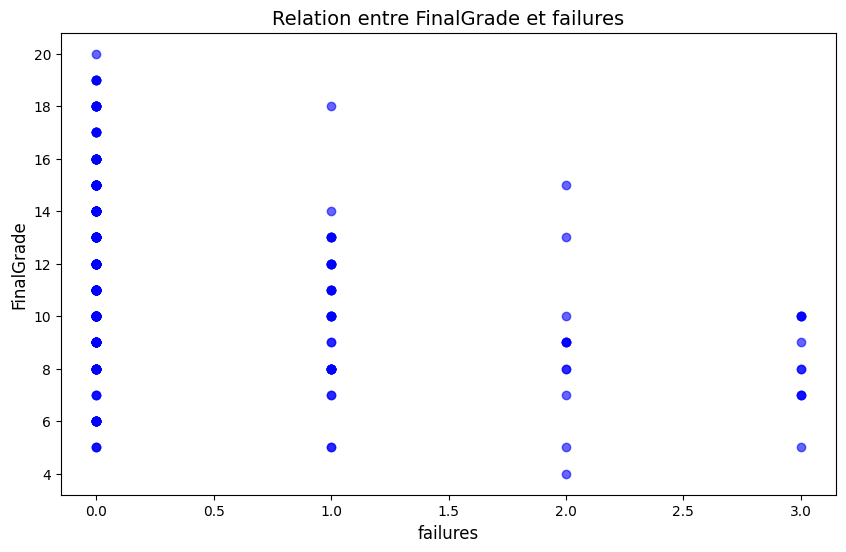

In [118]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction des failures
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['failures'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et failures', fontsize=14)
plt.xlabel('failures', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Les étudiants ayant 0 échec obtiennent une large gamme de notes, allant de 4 à 20, avec une concentration visible autour des notes élevées (15 à 20).
Au fur et à mesure que le nombre d'échecs augmente (1, 2 ou 3), les notes finales diminuent. Pour les étudiants avec 2 ou 3 échecs, la majorité des notes se situent entre 4 et 10, ce qui indique que plus un étudiant accumule d'échecs, plus sa note finale est faible.

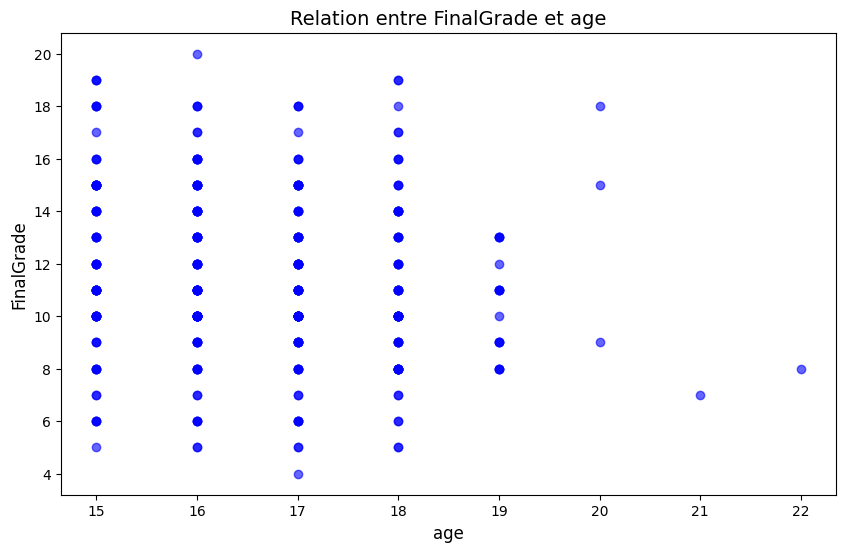

In [119]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction des age
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['age'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et age', fontsize=14)
plt.xlabel('age', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Nous remarquons que les etudiant agées ont une tendnce de ne pas avoir une bone note, pour cela, nous allons voir si cela reviens eu nombre d'echec

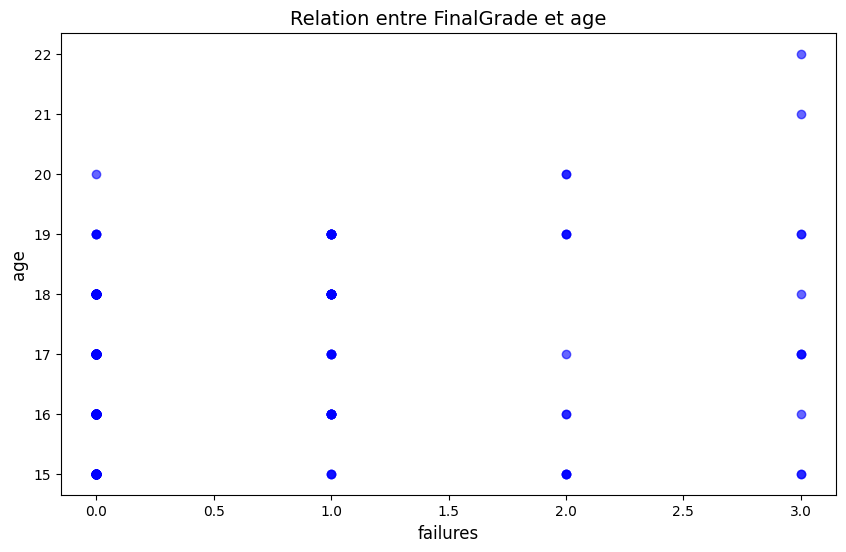

In [120]:
# Tracer un graphique scatter (nuage de points) de age en fonction failures
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['failures'], data_label_encoded['age'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et age', fontsize=14)
plt.xlabel('failures', fontsize=12)
plt.ylabel('age', fontsize=12)

# Afficher le graphique
plt.show()

Nous validons l'hypothèse que plus on est vieux, plus on a redoublé plus, plus on a une note au dessous de la moyenne, donc nous n'allons pas prendre l'age en compte, vu que c'est déja corrélé avec la variable failures

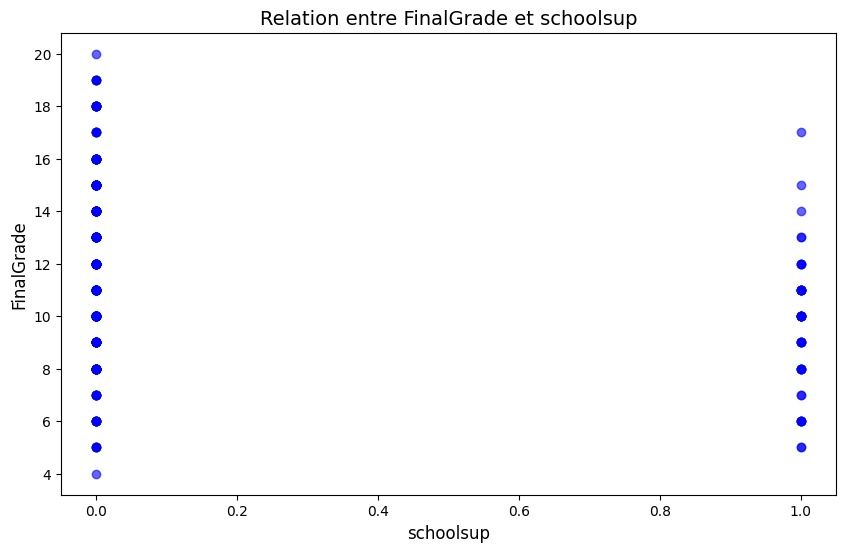

In [121]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction schoolsup
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['schoolsup'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et schoolsup', fontsize=14)
plt.xlabel('schoolsup', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Nous avons enocder la variable Schoolsup, 0 = no et 1= yes, cependant, on trouve que ceux qu'ils ont un support familiales n'ont pas eu des notes supérieurs, donc cette variables n'est pas significative'

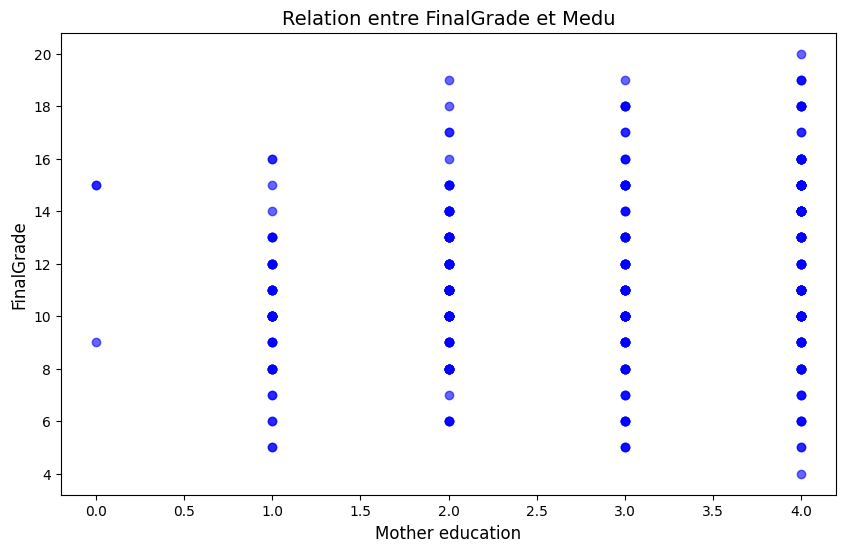

In [122]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction Medu
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['Medu'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et Medu', fontsize=14)
plt.xlabel('Mother education', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

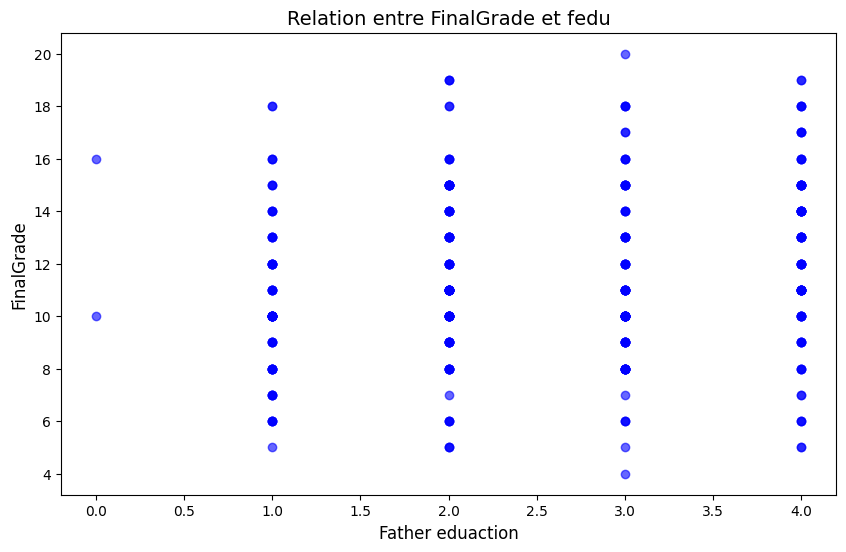

In [123]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction Father education
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['Fedu'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et fedu', fontsize=14)
plt.xlabel('Father eduaction', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Le graphique suggère que l'éducation de la mère et du père a un impact positif sur la note finale de l'étudiant, même si ce n'est pas le seul facteur déterminant. Il est probable que les parents plus éduquées offrent un environnement plus propice à la réussite académique, que ce soit par un soutien éducatif direct ou par des attentes plus élevées.

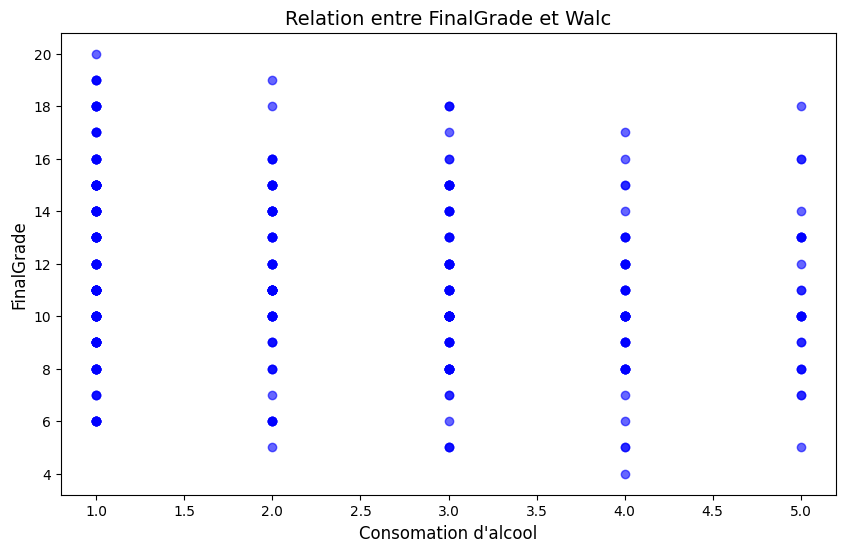

In [124]:
# Tracer un graphique scatter (nuage de points) de FinalGrade en fonction Walc
plt.figure(figsize=(10, 6))
plt.scatter(data_label_encoded['Walc'], data_label_encoded['FinalGrade'], color='blue', alpha=0.6)

plt.title('Relation entre FinalGrade et Walc', fontsize=14)
plt.xlabel('Consomation d\'alcool', fontsize=12)
plt.ylabel('FinalGrade', fontsize=12)

# Afficher le graphique
plt.show()

Les étudiants qui consomment peu d'alcool tendent à obtenir de meilleures notes, avec une plus grande proportion d'étudiants atteignant des notes élevées.
Au fur et à mesure que la consommation d'alcool augmente, on observe une baisse générale des notes finales, avec une majorité d'étudiants obtenant des résultats inférieurs à la moyenne (autour de 10).

A partir des diffèrents méthode ue nous avons vu, et des visuels, nous avons choisi que les variables qui seront inclus dans le calcul de la compléxité sont : Absences, failures, medu fedu, alc, studytime, goout, famrel, traveltime, 

In [125]:
data_final = data_label_encoded[['absences', 'Walc', 'goout', 'failures', 'Medu', 'Fedu','studytime','famrel','traveltime']]


# Calcule de la compléxité

In [126]:
# je vais commencer d'abord par normaliser mes variables par la fonction MinmaxScaller
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
data_coef = scaler.fit_transform(data_final)
data_coef = pd.DataFrame(data_coef,columns=data_final.columns)


In [127]:
data_coef['StudentId']= data['StudentID']
data_coef['FinalGrade']= data['FinalGrade']

In [128]:
data_coef.head()

,absences,Walc,goout,failures,Medu,Fedu,studytime,famrel,traveltime,StudentId,FinalGrade
0,0.080000,0.00,0.75,0.0,1.00,1.00,0.333333,0.75,0.333333,0,6
1,0.053333,0.00,0.50,0.0,0.25,0.25,0.333333,1.00,0.000000,1,6
2,0.133333,0.50,0.25,1.0,0.25,0.25,0.333333,0.75,0.000000,2,10
3,0.026667,0.00,0.25,0.0,1.00,0.50,0.666667,0.50,0.000000,3,15
4,0.053333,0.25,0.25,0.0,0.75,0.75,0.333333,0.75,0.000000,4,10


In [129]:

def calculer_complexity(row):
    complexity = row ['absences']+ row['failures'] + (1 - row['studytime']) + row['Walc']+row['goout']+ (1 - row['famrel'] ) + (1 - row['Medu']) + (1 - row['Fedu'])+ row['traveltime']
    return complexity

data_coef['complexité'] = data_coef.apply(calculer_complexity, axis=1)


In [130]:
print(data_coef['complexité'].describe())  
print(data_coef['complexité'].dtype)  


count    357.000000
mean       2.754155
std        1.020509
min        0.583333
25%        2.026667
50%        2.666667
75%        3.353333
max        6.500000
Name: complexité, dtype: float64
float64


In [131]:
# nous allons créer le graphe maitenant et le mettre en production en utilisant gradio

In [132]:
import gradio as gr
import plotly.express as px

In [135]:
def plot_graph():
    fig = px.scatter(
        data_frame = data_coef,
        x='FinalGrade',
        y= 'complexité',
        size= 'complexité',
        color= 'complexité',
        hover_data = ['StudentId'],
        labels={"FinalGrade": "Note Finale", "complexity_score": "Score de Complexité"},
        title = 'Priorisation des élèves à accompagner'
    )
    fig.update_layout(
        xaxis_title='Note final',
        yaxis_title='score de compléxité',
        template= 'plotly_white'
    )
    return fig

In [137]:
with gr.Blocks() as interface:

    gr.Markdown("""
    <div style='
        border: 2px solid #961233;
        padding: 10px;
        text-align: center;
        margin-bottom: 10px;
        background-color: #FFFFF;
        box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);
    '>
        <h1 style='font-size: 25px; color: #961233;'>Analyse de la priorisation des élèves en fonction de leur compléxité </h1>
    </div>
    """)
    
    gr.Markdown("""
    <p style='text-align: center; font-size: 1.2em; line-height: 1.6; color: #333;'>
    Pour mieux comprendre la situation de chaque élève, chaque bulle sur le graphe représente un élève. En balayant simplement chaque bulle avec la souris, vous verrez l’ID de l’élève, sa note, ainsi que son niveau de complexité. 
    Les élèves en jaune et orange sont ceux qui nécessitent un accompagnement prioritaire, car ils rencontrent plus de difficultés. Nous vous recommandons de concentrer vos efforts sur ces élèves en premier..
    </p>
    """)
    
    gr.Markdown("<h2 style='text-align: center; color: #333;'>Visualisation des élèves avec un score de complexité</h2>")
    gr.Plot(plot_graph())



In [138]:
# Lancer l'interface avec partage public
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7882
Running on public URL: https://24e78211377a28ceb2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
